Root Mean Squared Error (RMSE): 1.9191030050246154


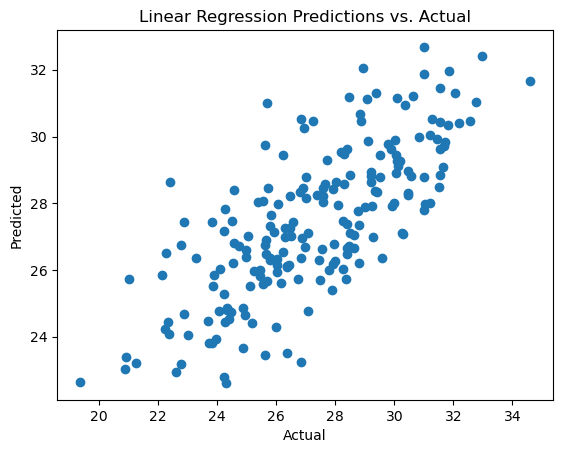

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate example IoT data
np.random.seed(0)
num_samples = 1000
temperature = np.random.uniform(20, 30, num_samples)  # Random temperature data
humidity = np.random.uniform(40, 60, num_samples)  # Random humidity data
target_variable = temperature * 0.5 + humidity * 0.3 + np.random.normal(0, 2, num_samples)  # Linear combination

# Create DataFrame
iot_data = pd.DataFrame({'Temperature': temperature, 'Humidity': humidity, 'Target': target_variable})

# Split data into features and target variable
X = iot_data[['Temperature', 'Humidity']]
y = iot_data['Target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Visualize predictions
plt.scatter(y_test, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression Predictions vs. Actual')
plt.show()


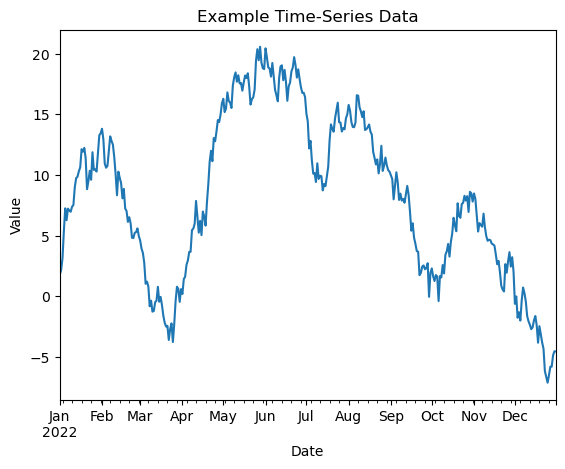

Root Mean Squared Error (RMSE): 4.277605771114918


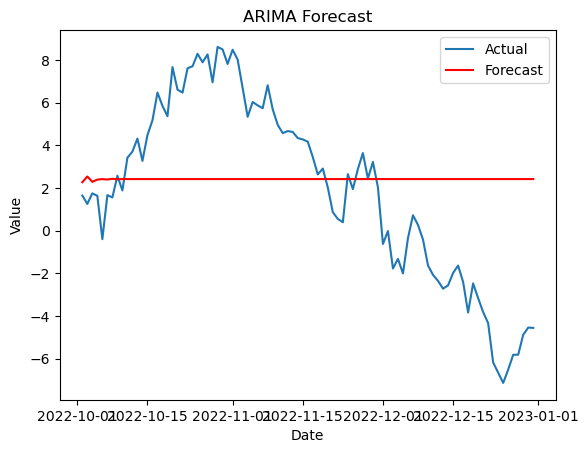

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Generate example time-series data
np.random.seed(0)
time = pd.date_range(start='2022-01-01', end='2022-12-31')
data = np.random.randn(len(time)).cumsum()  # Random walk data
ts_data = pd.Series(data, index=time)

# Visualize the time-series data
ts_data.plot()
plt.title('Example Time-Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Split data into training and testing sets
train_data = ts_data[:'2022-10-01']
test_data = ts_data['2022-10-02':]

# Fit ARIMA model
model = ARIMA(train_data, order=(5,1,0))  # ARIMA(p,d,q)
fitted_model = model.fit()

# Forecast
forecast = fitted_model.forecast(steps=len(test_data))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Visualize the forecast
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


C:\Users\shraddhavasa\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━

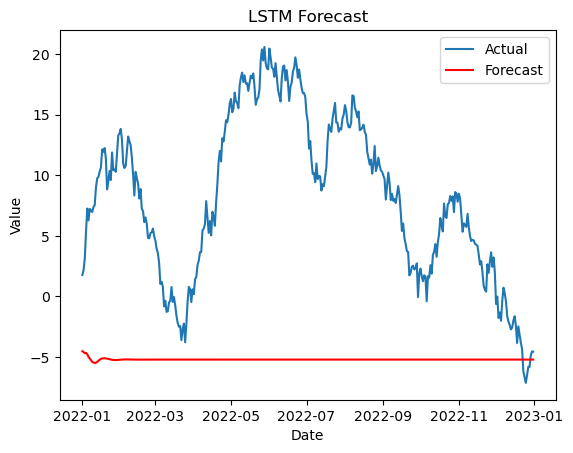

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare data for LSTM
look_back = 7  # Number of previous time steps to use as input features
X, y = [], []
for i in range(len(data) - look_back):
    X.append(data[i:i+look_back])
    y.append(data[i+look_back])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit LSTM model
model.fit(X, y, epochs=100, batch_size=1, verbose=0)

# Forecast
forecast = []
input_data = data[-look_back:].reshape((1, look_back, 1))
for i in range(len(time)):
    next_pred = model.predict(input_data)[0,0]
    forecast.append(next_pred)
    next_input = np.reshape(next_pred, (1, 1, 1))  # Reshape forecasted value to match input_data shape
    input_data = np.append(input_data[:,1:,:], next_input, axis=1)

# Visualize the forecast
plt.plot(time, ts_data, label='Actual')
plt.plot(time, forecast, label='Forecast', color='red')
plt.title('LSTM Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

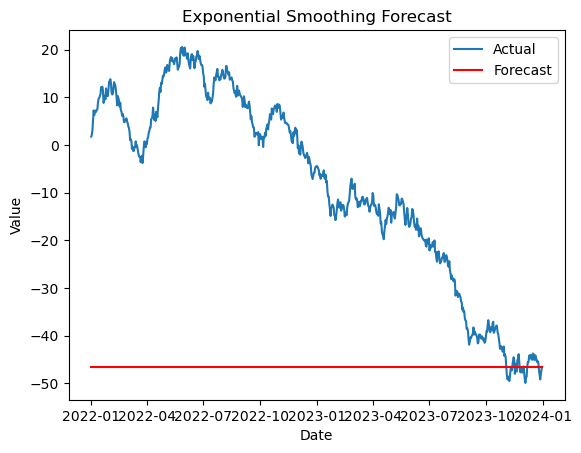

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Generate example time-series data
np.random.seed(0)
time = pd.date_range(start='2022-01-01', end='2023-12-31')
data = np.random.randn(len(time)).cumsum()  # Random walk data
ts_data = pd.Series(data, index=time)

# Fit Simple Exponential Smoothing model
model = SimpleExpSmoothing(ts_data)
fitted_model = model.fit()

# Forecast
forecast = fitted_model.forecast(len(time))

# Visualize the forecast
plt.plot(ts_data.index, ts_data, label='Actual')
plt.plot(ts_data.index, forecast, label='Forecast', color='red')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

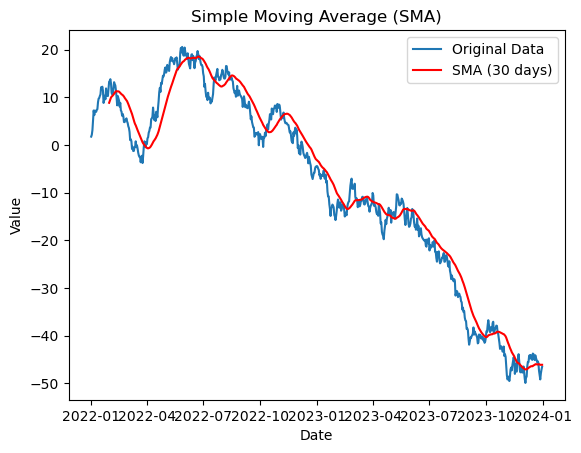

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate example time-series data
np.random.seed(0)
time = pd.date_range(start='2022-01-01', end='2023-12-31')
data = np.random.randn(len(time)).cumsum()  # Random walk data
ts_data = pd.Series(data, index=time)

# Calculate Simple Moving Average (SMA)
window_size = 30  # Define the window size for the moving average
sma = ts_data.rolling(window=window_size).mean()

# Visualize the original data and SMA
plt.plot(ts_data, label='Original Data')
plt.plot(sma, label=f'SMA ({window_size} days)', color='red')
plt.title('Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


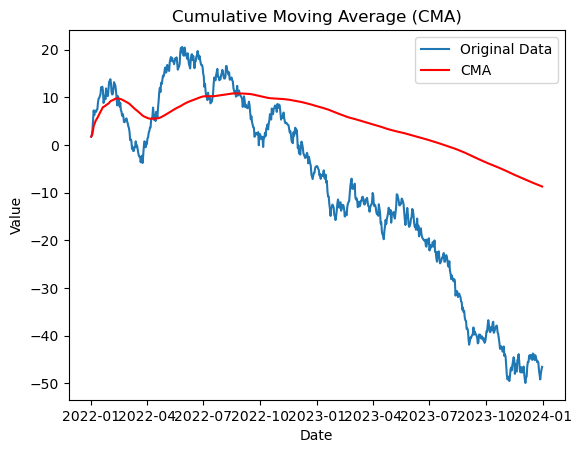

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate example time-series data
np.random.seed(0)
time = pd.date_range(start='2022-01-01', end='2023-12-31')
data = np.random.randn(len(time)).cumsum()  # Random walk data
ts_data = pd.Series(data, index=time)

# Calculate Cumulative Moving Average (CMA)
cma = ts_data.expanding().mean()

# Visualize the original data and CMA
plt.plot(ts_data, label='Original Data')
plt.plot(cma, label='CMA', color='red')
plt.title('Cumulative Moving Average (CMA)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


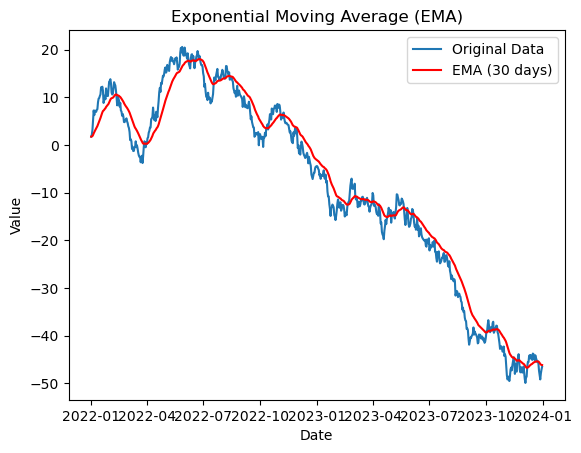

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate example time-series data
np.random.seed(0)
time = pd.date_range(start='2022-01-01', end='2023-12-31')
data = np.random.randn(len(time)).cumsum()  # Random walk data
ts_data = pd.Series(data, index=time)

# Calculate Exponential Moving Average (EMA)
span = 30  # Define the span for the EMA
ema = ts_data.ewm(span=span, adjust=False).mean()

# Visualize the original data and EMA
plt.plot(ts_data, label='Original Data')
plt.plot(ema, label=f'EMA ({span} days)', color='red')
plt.title('Exponential Moving Average (EMA)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


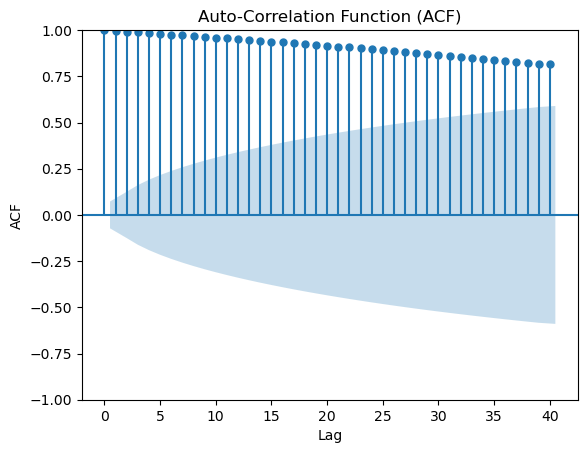

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Generate example time-series data
np.random.seed(0)
time = pd.date_range(start='2022-01-01', end='2023-12-31')
data = np.random.randn(len(time)).cumsum()  # Random walk data
ts_data = pd.Series(data, index=time)

# Calculate and plot ACF
plot_acf(ts_data, lags=40)  # Specify the number of lags to include
plt.title('Auto-Correlation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()


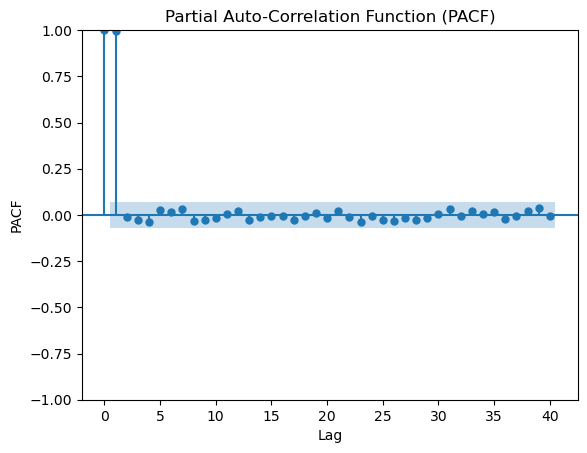

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Generate example time-series data
np.random.seed(0)
time = pd.date_range(start='2022-01-01', end='2023-12-31')
data = np.random.randn(len(time)).cumsum()  # Random walk data
ts_data = pd.Series(data, index=time)

# Calculate and plot PACF
plot_pacf(ts_data, lags=40)  # Specify the number of lags to include
plt.title('Partial Auto-Correlation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()
